In [1]:
import pandas as pd

x = pd.read_excel (r'C:/Users/Anindita/Desktop/X.xlsx',index_col=0)['Chicken']
y = pd.read_excel (r'C:/Users/Anindita/Desktop/Y.xlsx',index_col=0)['Egg']
df = pd.concat([y,x],axis=1)
df.columns = ['Y','X']
df.head(14)

,Y,X
Year,,
1932,3327,436815
1933,3255,444523
1934,3156,433937
1935,3081,389958
1936,3166,403446
1937,3443,423921
1938,3424,389624
1939,3561,418591
1940,3640,438288


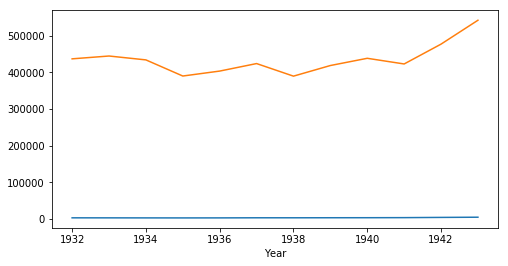

In [2]:
# Plot the time series
import matplotlib.pyplot as plt
%matplotlib inline
df.Y.plot(figsize=(8,4))
df.X.plot(figsize=(8,4))
plt.show()

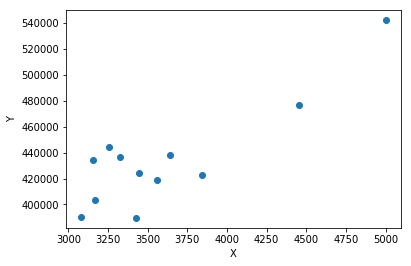

In [3]:
plt.scatter(df.Y,df.X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
#Hedge Ratio
import statsmodels.api as sm
model = sm.OLS(df.Y, df.X)
model = model.fit() 
print(model.params[0])

0.008333398186459996


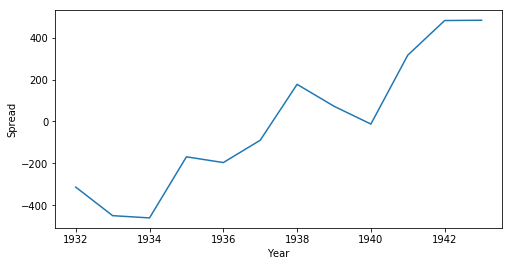

In [5]:
#Spread
df['spread'] = df.Y - model.params[0] * df.X
# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [6]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
adf[0]

-0.332806235982682

In [7]:
adf[4]

{'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}

In [ ]:
Conclusion: Since -0.3328 is greater than all the obtained values, Time series is not Stationarity.